## Demo of using ConstantRandomPercentualBias

In [1]:
from noisy_load_profiles import perturbations, Pipeline
import numpy as np
import matplotlib.pyplot as plt

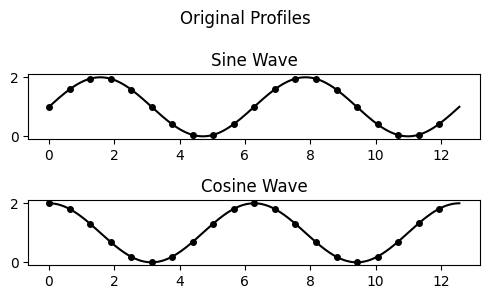

In [3]:
# build original load profiles, a sine and a cosine wave
timesteps = 1000
t = np.linspace(0, 4 * np.pi, timesteps)
original_profiles = np.array([np.sin(t), np.cos(t)]) + 1
original_profiles = original_profiles.T # shape (timesteps, 2)


# plot original profiles
fig, axs = plt.subplots(2, 1, figsize=(5, 3))

axs[0].plot(t, original_profiles[:, 0], label='Original Sine Wave', color="black", marker='o', markersize=4, markevery=50)
axs[0].set_title('Sine Wave')

axs[1].plot(t, original_profiles[:, 1], label='Original Cosine Wave', color='black',  marker='o', markersize=4, markevery=50)
axs[1].set_title('Cosine Wave')

fig.suptitle('Original Profiles')
fig.tight_layout()

In [4]:
help(perturbations.ConstantRandomPercentualBias)

Help on class ConstantRandomPercentualBias in module noisy_load_profiles.perturbations.systematic:

class ConstantRandomPercentualBias(noisy_load_profiles.base.Perturbation)
 |  ConstantRandomPercentualBias(uniform_low: float = -0.1, uniform_high: float = 0.1, seed: Optional[int] = None, transformation: Optional[Dict[str, Any]] = None, track_input_profiles: bool = False)
 |
 |  Per profile (column), sample a constant bias from a uniform distribution.
 |  This bias is multiplied by the mean of the absolute values of the profile to get a percentage bias.
 |  This percentage bias is then added to all timesteps of the profile.
 |
 |
 |  Formula: perturbed_profile = profile + bias*mean(profile)
 |
 |  Method resolution order:
 |      ConstantRandomPercentualBias
 |      noisy_load_profiles.base.Perturbation
 |      abc.ABC
 |      builtins.object
 |
 |  Methods defined here:
 |
 |  __init__(self, uniform_low: float = -0.1, uniform_high: float = 0.1, seed: Optional[int] = None, transformatio

In [5]:
# initialize a perturbation
perturbation = perturbations.ConstantRandomPercentualBias(seed=42)

# add a perturbation to a pipeline
pipeline = Pipeline([perturbation])

# apply the perturbation to the profiles
perturbed_profiles = pipeline.apply(original_profiles)


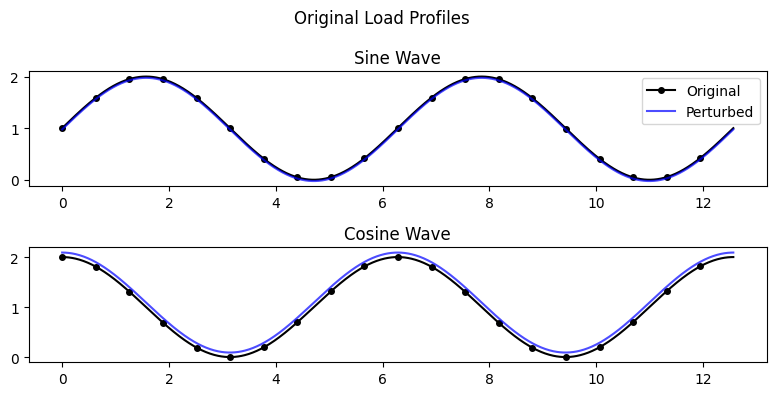

In [6]:
fig, axs = plt.subplots(2, 1, figsize=(8, 4))

axs[0].plot(t, original_profiles[:, 0], label='Original', color="black", marker='o', markersize=4, markevery=50)
axs[0].plot(t, perturbed_profiles[:, 0], label='Perturbed', color='blue', alpha=0.7)
axs[0].set_title('Sine Wave')
axs[0].legend()

axs[1].plot(t, original_profiles[:, 1], label='Original', color='black',  marker='o', markersize=4, markevery=50)
axs[1].plot(t, perturbed_profiles[:, 1], label='Perturbed', color='blue' , alpha=0.7)
axs[1].set_title('Cosine Wave')


fig.suptitle('Original Load Profiles')
fig.tight_layout()